In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib_venn as venn
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn import venn3, venn3_circles

In [216]:
df = pd.read_csv(r'C:\Users\aqngu\Desktop\Gleeson_Lab\Ukbb\Results\ukbb_fe_missense_af_anno_missing_phred_mpc_scores_reformat.tsv' , sep='\t')# header=None, skiprows=1, names=col_names)
df.head()


,id,annovar,snpeff,vep,ALT_Freq,Gnomad_Af,F_miss,Cadd_phred,Gene_Name_raw,MPC_score_raw,MPC_rankscore,Gene_Name_clean,n_gene,MPC_score_clean
0,10:100042450:G:T,1,1,0,0.00001,0.000000,0.0,0.604,CPN1,0.51056700513,0.49163,CPN1,1.0,0.510567
1,10:100042452:C:T,1,1,0,0.00001,0.000000,0.0,0.755,CPN1,0.401843167241,0.41154,CPN1,1.0,0.401843
2,10:100042515:C:T,1,1,0,0.00003,0.000028,0.0,0.390,CPN1,0.372204152062,0.38717,CPN1,1.0,0.372204
3,10:100042552:T:G,1,1,0,0.00002,0.000000,0.0,21.500,CPN1,0.447738651635,0.44630,CPN1,1.0,0.447739
4,10:100048762:G:A,1,1,0,0.00006,0.000200,0.0,8.151,CPN1,0.430792286785,0.43306,CPN1,1.0,0.430792


C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


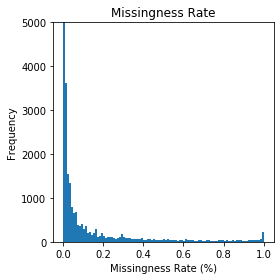

In [217]:
f, ax = plt.subplots(1,1,figsize=(4,4))
ax.hist(df['F_miss'],bins=100)
plt.ylim(0, 5000)
ax.set_title('Missingness Rate')
ax.set_xlabel('Missingness Rate (%)') # always label your plots
ax.set_ylabel('Frequency')
f.tight_layout()
f.show()

In [218]:
df2 = df[['id', 'annovar']]
df3 = df[['id', 'snpeff']]
df4 = df[['id', 'vep']]

anno = df2['annovar'].isin(['0'])
anno.df = df2[~anno]
anno_set = anno.df['id'].values.tolist()

snp = df3['snpeff'].isin(['0'])
snp.df = df3[~snp]
snp_set = snp.df['id'].values.tolist()

vep = df4['vep'].isin(['0'])
vep.df = df4[~vep]
vep_set = vep.df['id'].values.tolist()




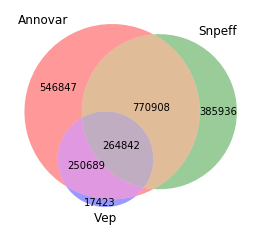

In [219]:
venn3([set(anno_set), set(snp_set), set(vep_set)], ('Annovar', 'Snpeff', 'Vep'))
plt.show()

In [220]:
#Filtering by missiness remove > 0.05
print('before filtering: ',len(df))
df5 = df.loc[(
    df['F_miss'] <= 0.05)  
]
print('after filtering:',len(df5))
df5.head()

before filtering:  2249815
after filtering: 2240819


,id,annovar,snpeff,vep,ALT_Freq,Gnomad_Af,F_miss,Cadd_phred,Gene_Name_raw,MPC_score_raw,MPC_rankscore,Gene_Name_clean,n_gene,MPC_score_clean
0,10:100042450:G:T,1,1,0,0.00001,0.000000,0.0,0.604,CPN1,0.51056700513,0.49163,CPN1,1.0,0.510567
1,10:100042452:C:T,1,1,0,0.00001,0.000000,0.0,0.755,CPN1,0.401843167241,0.41154,CPN1,1.0,0.401843
2,10:100042515:C:T,1,1,0,0.00003,0.000028,0.0,0.390,CPN1,0.372204152062,0.38717,CPN1,1.0,0.372204
3,10:100042552:T:G,1,1,0,0.00002,0.000000,0.0,21.500,CPN1,0.447738651635,0.44630,CPN1,1.0,0.447739
4,10:100048762:G:A,1,1,0,0.00006,0.000200,0.0,8.151,CPN1,0.430792286785,0.43306,CPN1,1.0,0.430792


In [221]:
df6 = df5[['id', 'annovar']]
df7 = df5[['id', 'snpeff']]
df8 = df5[['id', 'vep']]

anno2 = df6['annovar'].isin(['0'])
anno.df2 = df6[~anno2]
anno_set2 = anno.df2['id'].values.tolist()

snp2 = df7['snpeff'].isin(['0'])
snp.df2 = df7[~snp2]
snp_set2 = snp.df2['id'].values.tolist()

vep2 = df8['vep'].isin(['0'])
vep.df2 = df8[~vep2]
vep_set2 = vep.df2['id'].values.tolist()

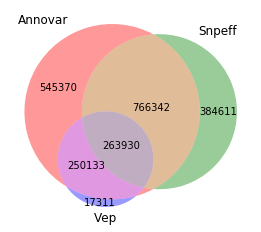

In [222]:
venn3([set(anno_set2), set(snp_set2), set(vep_set2)], ('Annovar', 'Snpeff', 'Vep'))
plt.show()

C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


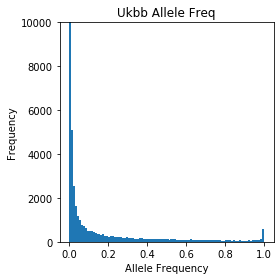

In [223]:
f, ax = plt.subplots(1,1,figsize=(4,4))
ax.hist(df5['ALT_Freq'],bins=100)
plt.ylim(0, 10000)
ax.set_title('Ukbb Allele Freq')
ax.set_xlabel('Allele Frequency') # always label your plots
ax.set_ylabel('Frequency')
f.tight_layout()
f.show()

C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


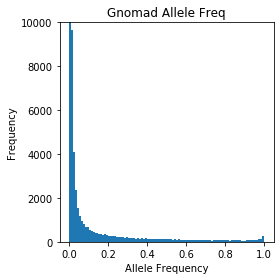

In [224]:
f, ax = plt.subplots(1,1,figsize=(4,4))
ax.hist(df5['Gnomad_Af'],bins=100)
plt.ylim(0, 10000)
ax.set_title('Gnomad Allele Freq')
ax.set_xlabel('Allele Frequency') # always label your plots
ax.set_ylabel('Frequency')
f.tight_layout()
f.show()

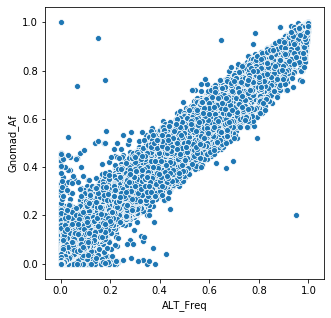

In [225]:
f, ax = plt.subplots(1,1,figsize=(5,5))
ax = sns.scatterplot(x='ALT_Freq', y='Gnomad_Af', ax=ax, data=df5)

C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


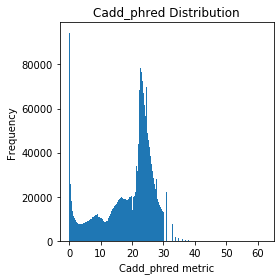

In [226]:
f, ax = plt.subplots(1,1,figsize=(4,4))
ax.hist(df5['Cadd_phred'],bins=200)

ax.set_title('Cadd_phred Distribution')
ax.set_xlabel('Cadd_phred metric') # always label your plots
ax.set_ylabel('Frequency')
f.tight_layout()
f.show()

C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


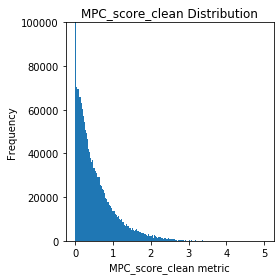

In [227]:
f, ax = plt.subplots(1,1,figsize=(4,4))
ax.hist(df5['MPC_score_clean'],bins=200)
plt.ylim(0, 100000)
ax.set_title('MPC_score_clean Distribution')
ax.set_xlabel('MPC_score_clean metric') # always label your plots
ax.set_ylabel('Frequency')
f.tight_layout()
f.show()

Gene Burden
MIN:0.0    MAX:22.0
MEAN:0.96    MEDIAN:1.0
IQR:1.0-1.0    SD:0.26


C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


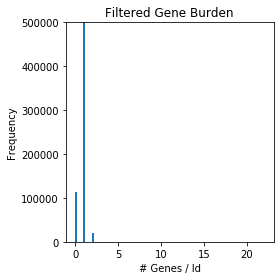

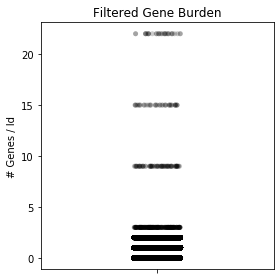

In [215]:
def sumstats(x):
    low = min(x)
    high = max(x)
    mean = np.mean(x)
    med = np.median(x)
    q75, q25 = np.percentile(x, [75 ,25])
    sd = np.std(x)
    o = 'MIN:{low}    MAX:{high}\nMEAN:{mean}    MEDIAN:{med}\nIQR:{q25}-{q75}    SD:{sd}'.format(
        low=low,high=high,
        mean=np.round(mean,2),med=np.round(med,2),
        q25=np.round(q25,2),q75=np.round(q75,2), sd=np.round(sd,2)
    )
    print(o)

gene_burden = df5.groupby(by=["id"])["n_gene"].sum()
print('Gene Burden')
sumstats(gene_burden)

f, ax = plt.subplots(1,1,figsize=(4,4))
ax.hist(gene_burden,bins=100)
plt.ylim(0, 500000)
ax.set_title('Filtered Gene Burden')
ax.set_xlabel('# Genes / Id') # always label your plots
ax.set_ylabel('Frequency')
f.tight_layout()
f.show()

f, ax = plt.subplots(1,1,figsize=(4,4))

sns.stripplot(
    y=gene_burden,
    ax=ax,
    color='k',
    alpha=0.2, 
)
ax.set_title('Filtered Gene Burden')
ax.set_ylabel('# Genes / Id') 
ax.set_xlabel('')
f.tight_layout()
f.show()

In [228]:
#Filtering Rare variants (<1% Ukbb AF)
print('before filtering: ',len(df5))
df9 = df5.loc[(
    df5['ALT_Freq'] < 0.01)  
]
print('after filtering:',len(df9))
df9.head()

before filtering:  2240819
after filtering: 2213683


,id,annovar,snpeff,vep,ALT_Freq,Gnomad_Af,F_miss,Cadd_phred,Gene_Name_raw,MPC_score_raw,MPC_rankscore,Gene_Name_clean,n_gene,MPC_score_clean
0,10:100042450:G:T,1,1,0,0.00001,0.000000,0.0,0.604,CPN1,0.51056700513,0.49163,CPN1,1.0,0.510567
1,10:100042452:C:T,1,1,0,0.00001,0.000000,0.0,0.755,CPN1,0.401843167241,0.41154,CPN1,1.0,0.401843
2,10:100042515:C:T,1,1,0,0.00003,0.000028,0.0,0.390,CPN1,0.372204152062,0.38717,CPN1,1.0,0.372204
3,10:100042552:T:G,1,1,0,0.00002,0.000000,0.0,21.500,CPN1,0.447738651635,0.44630,CPN1,1.0,0.447739
4,10:100048762:G:A,1,1,0,0.00006,0.000200,0.0,8.151,CPN1,0.430792286785,0.43306,CPN1,1.0,0.430792


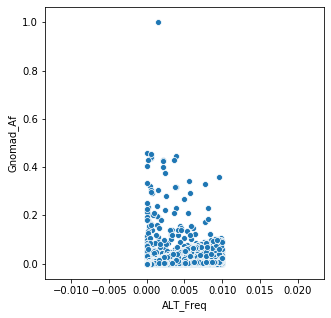

In [229]:
f, ax = plt.subplots(1,1,figsize=(5,5))
ax = sns.scatterplot(x='ALT_Freq', y='Gnomad_Af', ax=ax, data=df9)

C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


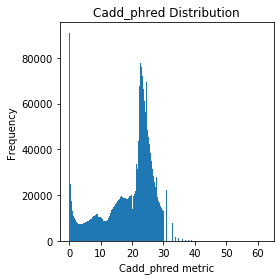

In [230]:
f, ax = plt.subplots(1,1,figsize=(4,4))
ax.hist(df9['Cadd_phred'],bins=200)

ax.set_title('Cadd_phred Distribution')
ax.set_xlabel('Cadd_phred metric') # always label your plots
ax.set_ylabel('Frequency')
f.tight_layout()
f.show()

C:\Users\aqngu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


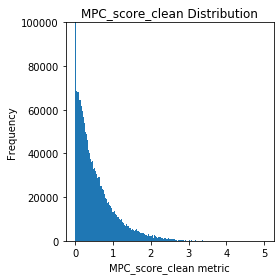

In [231]:
f, ax = plt.subplots(1,1,figsize=(4,4))
ax.hist(df9['MPC_score_clean'],bins=200)
plt.ylim(0, 100000)
ax.set_title('MPC_score_clean Distribution')
ax.set_xlabel('MPC_score_clean metric') # always label your plots
ax.set_ylabel('Frequency')
f.tight_layout()
f.show()